## Exercise 5
$$\large \textbf{Regularization}$$

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x = np.loadtxt('./ex5Data/ex5Linx.dat', dtype=np.float32)
y = np.loadtxt('./ex5Data/ex5Liny.dat', dtype=np.float32)
x.shape, y.shape

((7,), (7,))

### Plot the data

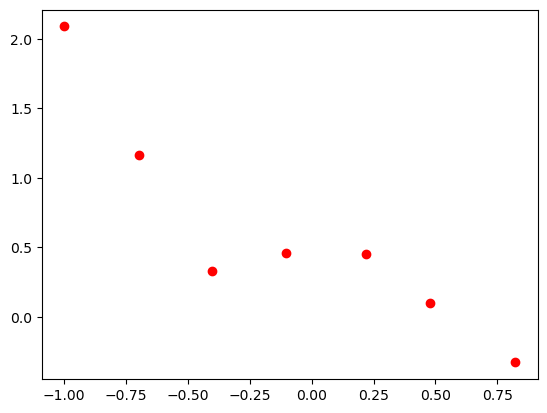

In [18]:
plt.scatter(x, y, marker='o', c='r')
plt.show()

### Transforming x into a feature matrix X for polynomial regression up to the fifth order.

In [19]:
X = x.reshape(x.shape[0], 1)

In [20]:
X.shape

(7, 1)

In [21]:
X2=X**2
X3=X**3
X4=X**4
X5=X**5
X=np.concatenate((np.ones((X.shape[0], 1), dtype=np.float32), X,X2,X3,X4,X5),axis=1)

In [22]:
X.shape

(7, 6)

In [23]:
X

array([[ 1.00000000e+00, -9.97680008e-01,  9.95365381e-01,
        -9.93056178e-01,  9.90752280e-01, -9.88453746e-01],
       [ 1.00000000e+00, -6.95739985e-01,  4.84054118e-01,
        -3.36775810e-01,  2.34308392e-01, -1.63017720e-01],
       [ 1.00000000e+00, -4.03730005e-01,  1.62997916e-01,
        -6.58071488e-02,  2.65683215e-02, -1.07264286e-02],
       [ 1.00000000e+00, -1.02360003e-01,  1.04775699e-02,
        -1.07248407e-03,  1.09779474e-04, -1.12370271e-05],
       [ 1.00000000e+00,  2.20239997e-01,  4.85056564e-02,
         1.06828855e-02,  2.35279859e-03,  5.18180372e-04],
       [ 1.00000000e+00,  4.77420002e-01,  2.27929860e-01,
         1.08818270e-01,  5.19520193e-02,  2.48029344e-02],
       [ 1.00000000e+00,  8.22290003e-01,  6.76160872e-01,
         5.56000292e-01,  4.57193494e-01,  3.75945628e-01]], dtype=float32)

In [24]:
x

array([-0.99768, -0.69574, -0.40373, -0.10236,  0.22024,  0.47742,
        0.82229], dtype=float32)

### Hypothesis, Cost and Gradient Functions

In [25]:
def hypothesis(X, theta):
    return np.dot(X, theta)

#### Regularized Cost function formula:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 

In [26]:
def cost(X, y, theta, lam):
    reg_term = (lam / (2 * X.shape[0])) * np.sum(theta[1:]**2)
    return (1 / (2 * X.shape[0])) * np.sum((hypothesis(X, theta) - y)**2) + reg_term

In [27]:
theta[1:]

array([0., 0., 0., 0., 0.])

#### Regularized Gradient Descent Formula:

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align*}$$

In [76]:
def gradient_theta(X,y, theta, lam):
    m = X.shape[0] # len(X)
    reg_term = lam/m*theta
    reg_term[0] = 0
    return (1/m)*np.dot(X.T, (hypothesis(X, theta) - y)) + reg_term

NameError: name 'w' is not defined

### For lamda = 0

In [64]:
theta = np.zeros(X.shape[1])
epochs = []
costVal = []
lam = 0
lr=0.1

# Gradient descent
for i in range(1, 1000):
    costVal.append(cost(X, y, theta, lam))
    d_theta = gradient_theta(X, y, theta, lam)
    
    theta = theta - lr*(d_theta)
    
    epochs.append(i)    

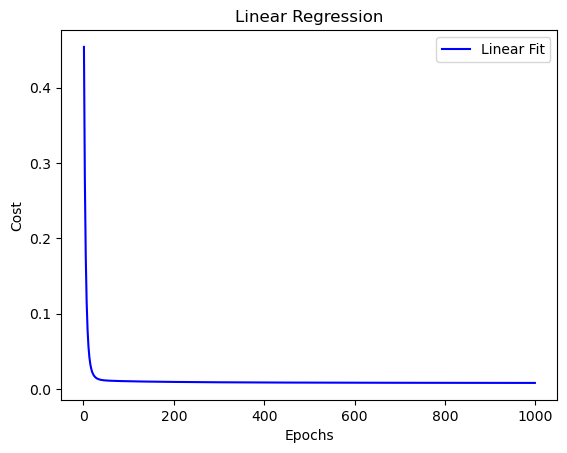

In [65]:
plt.plot(epochs, costVal, c='b', label='Linear Fit')
plt.title("Linear Regression")
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [66]:
H = hypothesis(X, theta)
H

array([ 2.12146715,  0.99552099,  0.57360676,  0.41331231,  0.31347557,
        0.17522481, -0.33208154])

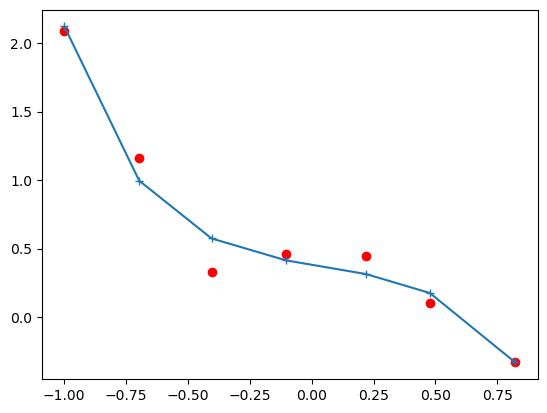

In [67]:
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, H, marker='+')
plt.show()

### For lamda = 1

In [68]:
theta = np.zeros(X.shape[1])
epochs = []
costVal = []
lam = 1
lr=0.1

# Gradient descent
for i in range(1, 1000):
    costVal.append(cost(X, y, theta, lam))
    d_theta = gradient_theta(X, y, theta, lam)
    
    theta = theta - lr*(d_theta)
    
    epochs.append(i)   

In [69]:
H = hypothesis(X, theta)
H

array([ 1.85009501,  0.98324896,  0.62300748,  0.44246187,  0.307224  ,
        0.18373332, -0.12915058])

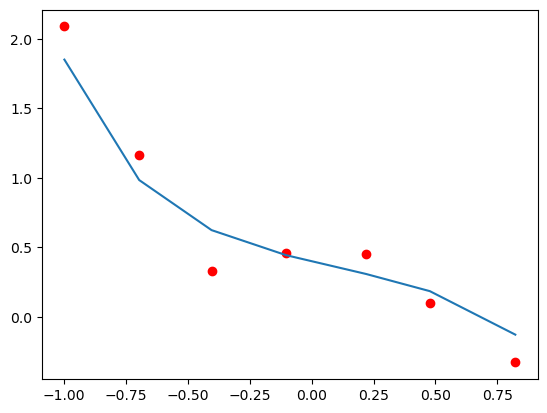

In [70]:
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, H)
plt.show()

### For lamda = 10

In [71]:
theta = np.zeros(X.shape[1])
epochs = []
costVal = []
lam = 10
lr=0.1

# Gradient descent
for i in range(1, 1000):
    costVal.append(cost(X, y, theta, lam))
    d_theta = gradient_theta(X, y, theta, lam)
    
    theta = theta - lr*(d_theta)
    
    epochs.append(i)    

In [72]:
H = hypothesis(X, theta)
H

array([1.11018683, 0.76498047, 0.61713741, 0.53995607, 0.48174252,
       0.43172397, 0.31489279])

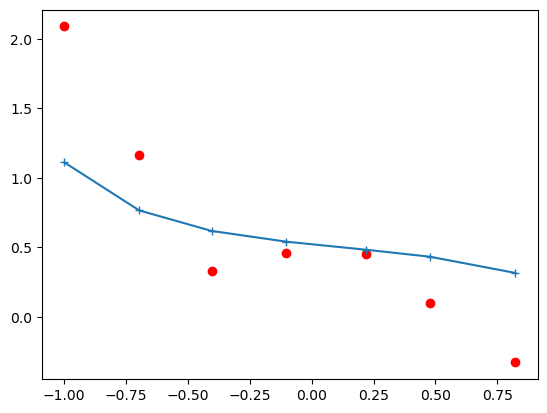

In [73]:
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, H, marker='+')
plt.show()

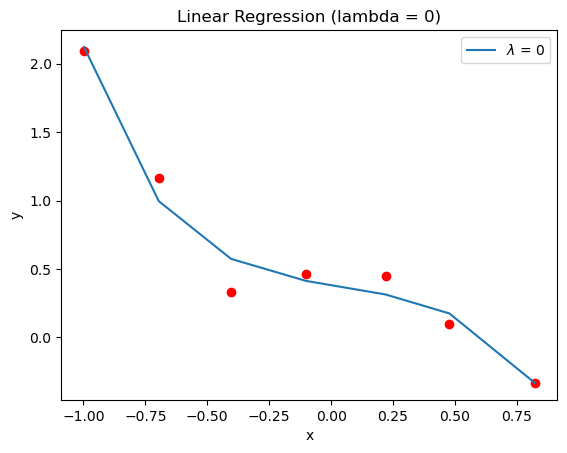

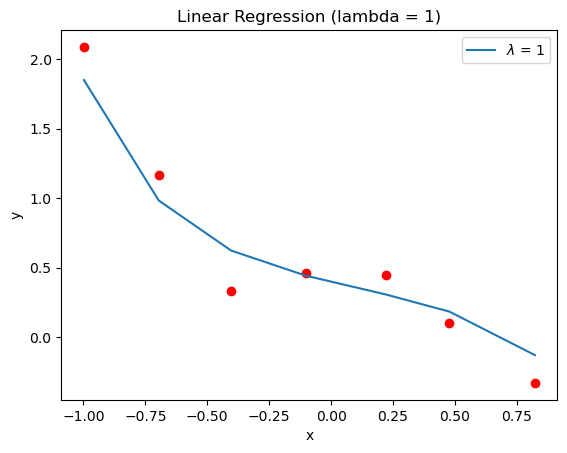

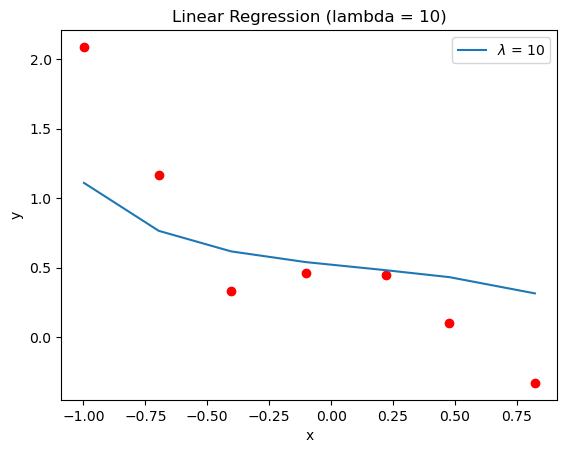

In [52]:
theta = np.zeros(X.shape[1])
# epochs = np.arange(1, 1001)
lam_values = np.array([0, 1, 10])
lr = 0.1

for lam in lam_values:
    costVal = []
    theta = np.zeros(X.shape[1])
    for i in range(1, 1001):
        costVal.append(cost(X, y, theta, lam))
        d_theta = gradient_theta(X, y, theta, lam)
        theta = theta - lr * d_theta

    H = hypothesis(X, theta)
    plt.scatter(x, y, marker='o', c='r')
    plt.plot(x, H, label=f'$\lambda$ = {lam}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Linear Regression (lambda = {lam})')
    plt.legend()
    plt.show()

## Normal Equation

In [314]:
theta = np.linalg.pinv(np.dot(X.T, X)).dot(np.dot(X.T, y))

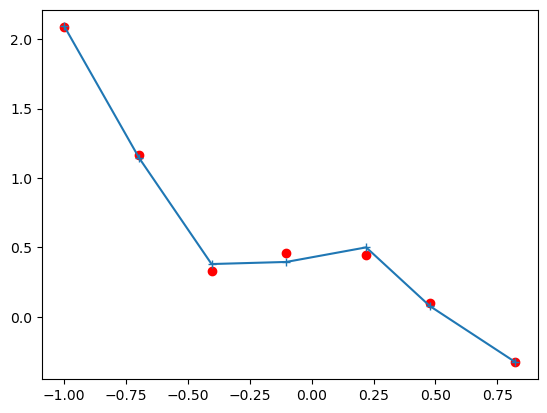

In [315]:
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, hypothesis(X, theta), marker='+')
plt.show()

$$theta = \left( X^\intercal X + \lambda I \right)^{-1} X^\intercal y$$ 

In [316]:
def regularized_normal_equation(X, y, lam):
    m = X.shape[0]
    n = X.shape[1]  
    # Regularization term
    reg_term = lam * np.identity(n)
    reg_term[0, 0] = 0
    
    theta = np.linalg.inv(X.T.dot(X) + reg_term).dot(X.T).dot(y)
    return theta

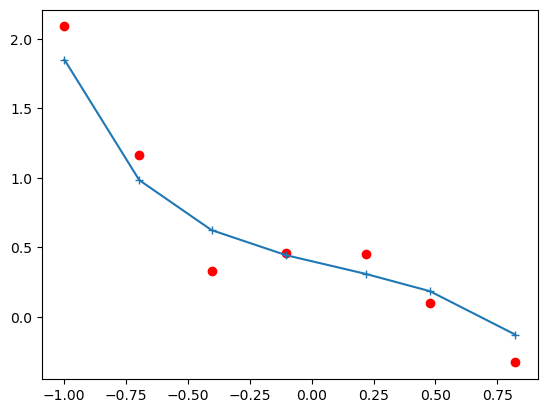

In [363]:
lam = 1
theta = regularized_normal_equation(X, y, lam)
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, hypothesis(X, theta), marker='+')
plt.show()

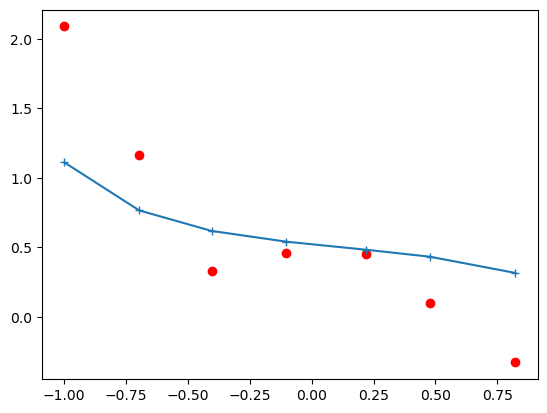

In [385]:
lam = 10
theta = regularized_normal_equation(X, y, lam)
plt.scatter(x, y, marker='o', c='r')
plt.plot(x, hypothesis(X, theta), marker='+')
plt.show()

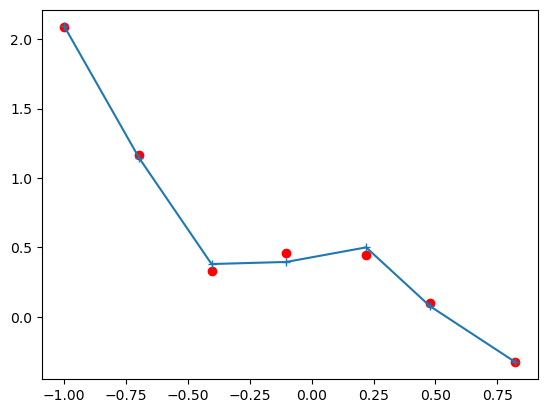

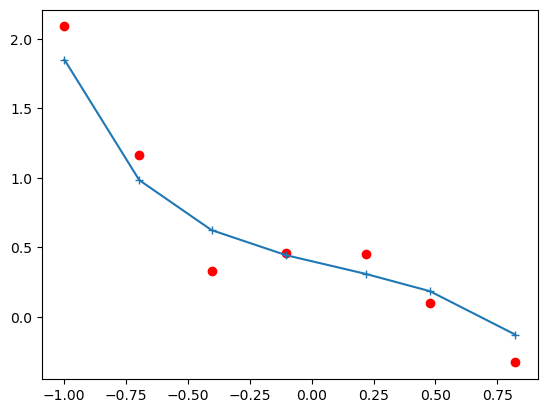

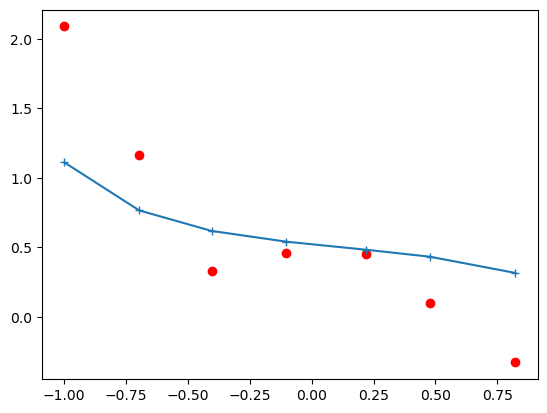

In [386]:
lam = [0,1,10]
for l in lam:
    theta = regularized_normal_equation(X, y, l)
    plt.scatter(x, y, marker='o', c='r')
    plt.plot(x, hypothesis(X, theta), marker='+')
    plt.show()